# Source: [Microsoft Learn](https://learn.microsoft.com/en-us/training/modules/explore-analyze-data-with-python/?WT.mc_id=cloudskillschallenge_8aee1e58-eeb8-409f-b0d0-d15afcc8045c&source=docs&ns-enrollment-type=Collection&ns-enrollment-id=o1qrb5wedm52).

# Flights Data Exploration 

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - understand the data before cleaning up:
        ***-> How many num of rows and columns in it, name Header of columns, type of every column***
        ***-> Use graph or visualization to explain what the data is about***
        ***-> Describe function implemented on every column of the data sepretly***
    - Identify any null or missing data, and impute appropriate replacement values.
        ***-> Identify null values in all datasets***
        ***->  Difference between null values and missing data***
        ***-> Give output of null values in form of two rows, DepDelay & ArrDelay only***
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
        ***-> What is outliers & why we remove outliers from data?***
        ***-> What are the techniques that are used to identify outliers***
        ***-> What are techniques that are used to eliminate outliers, Why we need to remove them in term of AI models.***

2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
       ***-> Create 2 dataframes of statics data and categorical data from dataset***
       ***-> Convert numerical data in a constant way.*** 
       ***-> Create function to take summary statistics of the columns & make graph of only DepDelay & ArrDelay summary data,***
       ***-> Function take input as df[given_col], implement & print logic of summary and create a histogram of given colum summary stats***
    

    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        -> 0.11706307132970664
        - *How do the carriers compare in terms of arrival delay performance?*
        ?
        - *Is there a noticable difference in arrival delays for different days of the week?*
        ?
        - *Which departure airport has the highest average departure delay?*
        -> chicago international 
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        -> No answer
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        -> You give four, I need one of highest in a string form not tabular form
        - *Which route has the highest average arrival delay?*
        -> Pittsburgh International  Raleigh-Durham International    63.0
        
Add markdown and code cells as required to create your solution.

> **Note**: 
What are the uses of graphs and which graph you use for which purpose. 
BOX PLOT, HISTORGRAM, SCATTER 
What are the difference between null values and empty values

what is aggregate function and how we use it

what's the diff of float and int64

what is the datatype of categorical data
OBJ

How to gather insights from data. 


what is the use of descirbe function and it's sub function


mean, std, mode, 25%, 75%

Convert Year, Month & Day into Date&Time formate using pd.Dateandtime


1. AggregateFunction implementation:
- Best and worst days of the month by using DayOFMonth column
- how many flights are Cancelled, Delayed and arrival delay of them
- Which airport has most departure Delay and which has most arr delay

2. Advanced agg funtion:
*Use a custom lambda function in .agg()*
**Problem:** *For each airline (Carrier), calculate the following metrics related to departure delays:*
- delayed_flights – Total number of flights delayed by more than 15 minutes.
- total_flights – Total number of flights operated by the airline.
- delay_rate – Proportion of delayed flights (i.e., delay rate as a decimal value).

3. Time Manipulation
*Very very useful for real time data*
**Statements to solve**
- Create a TimeStampp column
- Daily Cancellation date 
- Compare Delays on Weekend vs Normal day
- Give a function in which you tell me about a specific Flight details that include: 
***Plane Origin Airport, Origin City, Origin State, Dest Airport's Name of that flight, Dest City, State, Wheter a delay occur in Dep & Arr or not, number of mintues each delay occur.  Time & Date of flight***


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv("Data/flights.csv")

## Start by cleaning the data.

**understand the data before cleaning up: -> How many num of rows and columns in it, name Header of columns, type of every column -> Use graph or visualization to explain what the data is about -> Describe function implemented on every column of the data sepretly**

In [3]:
print("The number of rows in the dataset are : ", df.shape[0])
print("The number of columns in the dataset are : ", df.shape[1])

# Name of the Columns in the datset
print("\nThe columns in the dataset are ;", df.columns)
print("\n The datatype of the columns in the dataset :\n", df.dtypes)

df.describe()

The number of rows in the dataset are :  271940
The number of columns in the dataset are :  20

The columns in the dataset are ; Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

 The datatype of the columns in the dataset :
 Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Carrier               object
OriginAirportID        int64
OriginAirportName     object
OriginCity            object
OriginState           object
DestAirportID          int64
DestAirportName       object
DestCity              object
DestState             object
CRSDepTime             int64
DepDelay               int64
DepDel15             float64
CRSArrTime             int6

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


**Identify any null or missing data, and impute appropriate replacement values. -> Identify null values in all datasets -> Difference between null values and missing data -> Give output of null values in form of two rows, DepDelay & ArrDelay only**

In [25]:
# Identify any null or missing data in dataset
print(df.isnull().sum())

# Null va;ues in DepDelay
print("\nNull values in DepDelay column: ",df.DepDelay.isnull().sum())

# Null va;ues in ArrpDelay
print("\nNull values in ArrDelay column: ",df.ArrDelay.isnull().sum())

df["DepDel15"].fillna(df["DepDel15"].mean(), inplace=True)



Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
DepStatus            0
ArrStatus            0
Date                 0
Weekends             0
Normaldays           0
dtype: int64

Null values in DepDelay column:  0

Null values in ArrDelay column:  0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14568\1545470928.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DepDel15"].fillna(df["DepDel15"].mean(), inplace=True)


In [5]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

**Identify and eliminate any outliers in the DepDelay and ArrDelay columns. -> What is outliers & why we remove outliers from data? -> What are the techniques that are used to identify outliers -> What are techniques that are used to eliminate outliers, Why we need to remove them in term of AI models**

## Outliers : 
           **Data points that deviate from the typical values being much higher or much lower than the rest of the data**
           **We remove the outliers to improve the accuracy of data analysis**
           
    What are the techniques that are used to identify outliers
        Z-score 
        Interquantile


In [6]:
# DepDelay
# Upper limit
upper_limit = df["DepDelay"].mean() + 3*df["DepDelay"].std()

# Lower limit
lower_limit = df["DepDelay"].mean() - 3*df["DepDelay"].std()

In [7]:
# Trmmimg the data of DepDelay column 
df = df.loc[(df["DepDelay"] > lower_limit) & (df["DepDelay"] < upper_limit)]

Text(0.5, 1.0, 'Whisker plot of DepDelay column after removing the outliers')

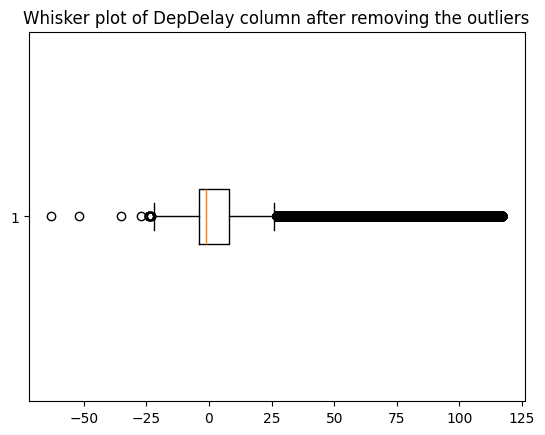

In [8]:
var = df["DepDelay"]
# Whisker plot of DepDelay column after removing the outliers
plt.boxplot(var, vert=False)
plt.title("Whisker plot of DepDelay column after removing the outliers")

## Explore the cleaned data.

View summary statistics for the numeric fields in the dataset. -> Create 2 dataframes of statics data and categorical data from dataset -> Convert numerical data in a constant way. -> Create function to take summary statistics of the columns & make graph of only DepDelay & ArrDelay summary data, -> Function take input as df[given_col], implement & print logic of summary and create a histogram of given colum summary stats

Determine the distribution of the DepDelay and ArrDelay columns.

In [9]:
# Create 2 dataframes of statics data and categorical data from dataset 

# Categorical data
df_categorical = df.select_dtypes(include = ['object'])
print("\n Categorical data :\n ",df_categorical)

# Statics data
df_numerical = df.select_dtypes(include = ["number"])
print("Numerical data / Statics data : \n", df_numerical)


 Categorical data :
         Carrier                         OriginAirportName     OriginCity  \
0           DL                       Tampa International          Tampa   
1           WN                  Pittsburgh International     Pittsburgh   
2           AS              Seattle/Tacoma International        Seattle   
3           OO              Chicago O'Hare International        Chicago   
4           DL                     Norfolk International        Norfolk   
...        ...                                       ...            ...   
271935      VX                     Orlando International        Orlando   
271936      FL  Hartsfield-Jackson Atlanta International        Atlanta   
271937      WN                           William P Hobby        Houston   
271938      HA                           Kahului Airport        Kahului   
271939      UA               San Francisco International  San Francisco   

       OriginState                                    DestAirportName  \
0  

count    266033.000000
mean          6.443336
std          20.523827
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           8.000000
max         117.000000
Name: DepDelay, dtype: float64
(array([2.00000e+00, 1.00000e+00, 8.41000e+03, 1.93497e+05, 3.39500e+04,
       1.33690e+04, 7.00300e+03, 4.49100e+03, 3.03300e+03, 2.27700e+03]), array([-63., -45., -27.,  -9.,   9.,  27.,  45.,  63.,  81.,  99., 117.]), <BarContainer object of 10 artists>)
Text(0.5, 1.0, 'DepDelay')


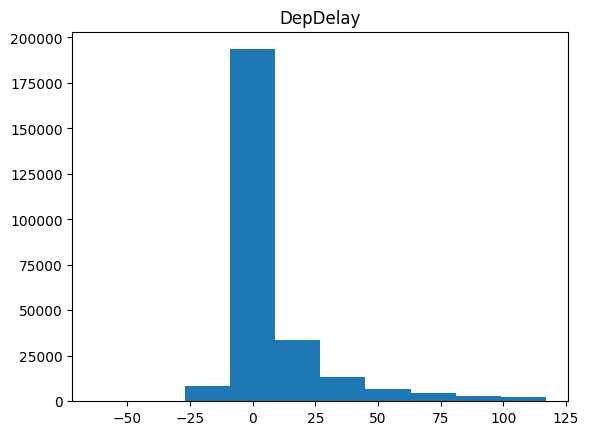

In [10]:
 # Function take input as df[given_col], implement & print logic of summary and create a histogram of given colum summary stats
def summary_of_column(column_name):
    print(df[column_name].describe())
    print(plt.hist(df[column_name]))
    print(plt.title(column_name))
    
summary_of_column("DepDelay")

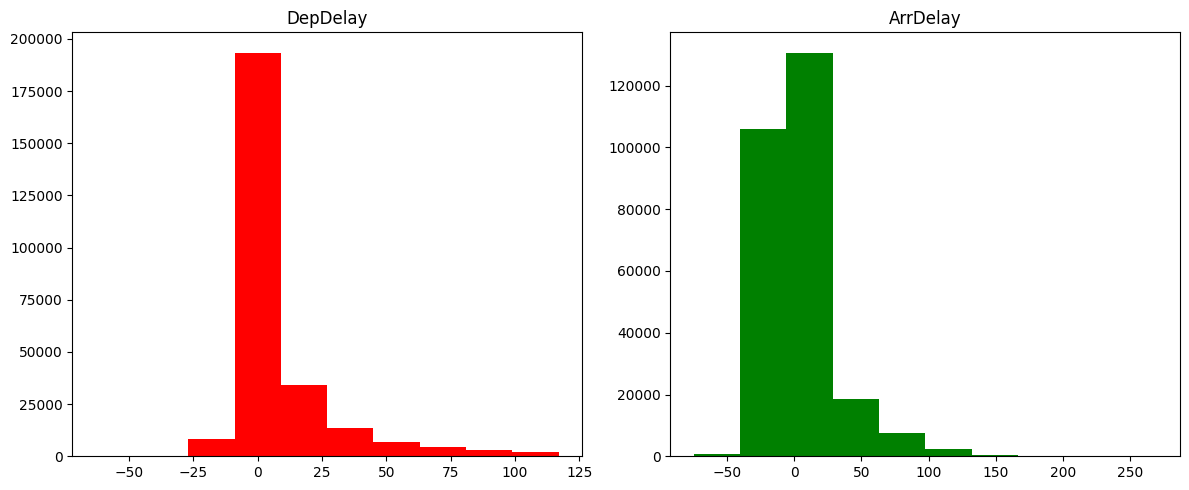

In [26]:
# Determine the distribution of the DepDelay and ArrDelay columns.
# DepDelay column distribution
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.hist(df["DepDelay"], color="red")
plt.title("DepDelay")

plt.subplot(1, 2, 2)
plt.hist(df["ArrDelay"], color='green')
plt.title("ArrDelay")

plt.tight_layout()
plt.show()

## Use statistics, aggregate functions, and visualizations to answer the following questions:

**What are the average (mean) departure and arrival delays?**

In [12]:
# The average (mean) departure delay
print("Average mean of departure delay is : ", df.DepDelay.mean())

# The average (mean) arrival delay
print("Average mean of arrival delay is : ", df.ArrDelay.mean())

Average mean of departure delay is :  6.443335977115621
Average mean of arrival delay is :  2.554277100961159


**Which departure airport has the highest average departure delay? -> chicago international**

In [13]:
dep_airport_mean = df.groupby("OriginAirportName")["DepDelay"].mean()
highest_average_departure_delay = dep_airport_mean.sort_values(ascending=False).head(1)

highest_average_departure_delay = highest_average_departure_delay.to_string().split()
highest_average_departure_delay = highest_average_departure_delay[1] +" "+ highest_average_departure_delay[3]

print("The departure airport that has the highest average departure delay is : ", highest_average_departure_delay)


The departure airport that has the highest average departure delay is :  Chicago International


**Do late departures tend to result in longer arrival delays than on-time departures?**

In [14]:
# Status of Arrival Delays
df["DepStatus"] = [1 if x >0 else 0 for x in df["DepDelay"]]

# Status of Arrival Delays 
df["ArrStatus"] = [1 if x >0 else 0 for x in df["ArrDelay"]]


In [15]:
# Group by departure status and calculate average arrival delay
result = df.groupby("DepStatus")["ArrDelay"].mean()
if result[1] > result[0]:
    print("Yes Late departures tend to result in longer arrival delays than on-time departures")


Yes Late departures tend to result in longer arrival delays than on-time departures


**Which route (from origin airport to destination airport) has the most late arrivals? -> You give four, I need one of highest in a string form not tabular form**
Which route has the highest average arrival delay? -> Pittsburgh International Raleigh-Durham International 63.0

In [16]:
most_late_arrival_delay = df.groupby(["OriginAirportName", "DestAirportName"])["ArrDelay"].mean().sort_values(ascending=False).head(1)
most_late_arrival_delay = most_late_arrival_delay.to_string().split()

print(f"The route that has most late arrivals is : From { most_late_arrival_delay[2]}  to { most_late_arrival_delay[4]} International")

The route that has most late arrivals is : From Pittsburgh  to Raleigh-Durham International


**Which route has the highest average arrival delay? -> Pittsburgh International Raleigh-Durham International 63.0**

In [17]:
arr_del = most_late_arrival_delay
print("Route has the highest average arrival delay is : ", " ".join(arr_del[2:]))


Route has the highest average arrival delay is :  Pittsburgh International Raleigh-Durham International 63.0


**what is aggregate function and how we use it**
The function perform operations and return a value

**what's the diff of float and int64**
float --> Decimal values
int64 --> Integer values

**what is the datatype of categorical data**
object

**How to gather insights from data.**
Read the data 
summaraixe the data
Shape
Rows and coumns 
Columns names
Statistics of each column

**what is the use of descirbe function and it's sub function**
Describe function gives :
max ---> Highest value, 
min ---> Lowest value, 
count ---> Number of values,  
mean ---Average value, 
standard deviation ---> Varaince / How the data is spread away from the mean, 
mode ---> most occuring value in the data , 
25%, 75% ---> help in detecting the outliers

**Convert Year, Month & Day into Date&Time formate using pd.Dateandtime**

In [18]:
import datetime
# df=pd.DataFrame(df)


df["Date"] = pd.to_datetime(df[["Year", "Month", "DayofMonth"]].rename(columns={"Year":"year", "Month":"month", "DayofMonth":"day"}))
df

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,DepStatus,ArrStatus,Date
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,1539,4,0.0,1824,13,0,0,1,1,2013-09-16
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,710,3,0.0,740,22,1,0,1,1,2013-09-23
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,810,-3,0.0,1614,-7,0,0,0,0,2013-09-07
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,804,35,1.0,1027,33,1,0,1,1,2013-07-22
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,545,-1,0.0,728,-9,0,0,0,0,2013-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,...,1730,1,0.0,1945,18,1,0,1,1,2013-09-20
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,1020,24,1.0,1218,61,1,0,1,1,2013-04-19
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,1540,30,1.0,1935,15,1,0,1,1,2013-10-26
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,...,609,-5,0.0,641,-6,0,0,0,0,2013-05-07


**AggregateFunction implementation:**
Best and worst days of the month by using DayOFMonth column
how many flights are Cancelled, Delayed and arrival delay of them
Which airport has most departure Delay and which has most arr delay

In [19]:
 # Best and worst days of the month by using DayOFMonth column 
a =df.groupby("DayofMonth")["Cancelled"].mean().sort_values(ascending=False)

print("The worst day of the month is : \n",a.head(1).to_string().split())

print("\nThe best day of the month is : \n",a.tail(1).to_string().split())

# Flights cancelled
print("\nThe number of flights cancelled are :", df["Cancelled"].value_counts()[1])

# Flights Delayed
delayed_flights = df[df["DepDelay"]>0]
print("\nThe number of flights that are delayed are : ", len(delayed_flights))

The worst day of the month is : 
 ['DayofMonth', '10', '0.023283']

The best day of the month is : 
 ['DayofMonth', '4', '0.00611']

The number of flights cancelled are : 2897

The number of flights that are delayed are :  105864


**Which airport has most departure Delay and which has most arr delay**

In [20]:
most_dep_delay = df.groupby("OriginAirportName")["DepDelay"].mean().sort_values(ascending=False).head(1).to_string().split()
print("The Airport that has most departure delay is :",most_dep_delay[1] ,most_dep_delay[3]," (", most_dep_delay[4] ,")" )

most_arr_delay = df.groupby("OriginAirportName")["ArrDelay"].mean().sort_values(ascending=False).head(1).to_string().split()
print("The Airport that has most arrival delay is :",most_arr_delay[1] ,most_arr_delay[3]," (", most_arr_delay[4] ,")" )

The Airport that has most departure delay is : Chicago International  ( 12.423505 )
The Airport that has most arrival delay is : Chicago International  ( 7.932165 )


## Advanced agg funtion: 
Use a custom lambda function in .agg() Problem: For each airline (Carrier), calculate the following metrics related to departure delays:
delayed_flights – Total number of flights delayed by more than 15 minutes.
total_flights – Total number of flights operated by the airline.
delay_rate – Proportion of delayed flights (i.e., delay rate as a decimal value).

Total number of flights delayed by more than 15 minutes are : 48234

The total flights operated by airline are :
 Carrier
9E     7765
AA    28273
AS     6719
B6    11975
DL    37818
EV    15288
F9     3467
FL     9174
HA     1865
MQ    11156
OO    15870
UA    27911
US    23284
VX     3396
WN    56963
YV     5109
dtype: int64


Text(0.5, 1.0, 'Delayed Flights')

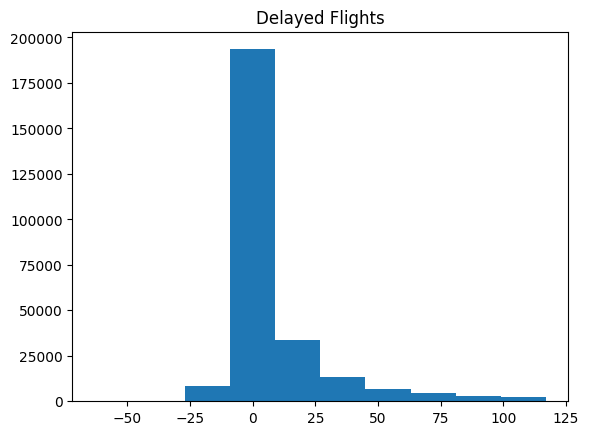

In [21]:
# Total number of flights delayed by more than 15 minutes
delay_flight = df["DepDel15"].value_counts()
print("Total number of flights delayed by more than 15 minutes are :", delay_flight[1])

# Total number of flights operated by the airline.
operated_flights = df.groupby("Carrier").size()
print("\nThe total flights operated by airline are :\n", operated_flights)

plt.hist(df["DepDelay"])
plt.title("Delayed Flights")

## 3. Time Manipulation
*Very very useful for real time data*
**Statements to solve**
- Create a TimeStampp column
- Daily Cancellation date 
- Compare Delays on Weekend vs Normal day
- Give a function in which you tell me about a specific Flight details that include: 
***Plane Origin Airport, Origin City, Origin State, Dest Airport's Name of that flight, Dest City, State, Wheter a delay occur in Dep & Arr or not, number of mintues each delay occur.  Time & Date of flight***


In [22]:
# Daily Cancellation date
cancelled_flights_dates = df.loc[df["Cancelled"] == 1, "Date"] 
cancelled_flights_dates

145      2013-09-12
171      2013-04-18
359      2013-05-22
429      2013-07-03
545      2013-04-13
            ...    
271410   2013-08-05
271607   2013-06-18
271634   2013-05-08
271671   2013-10-08
271885   2013-05-15
Name: Date, Length: 2897, dtype: datetime64[ns]

In [23]:
# Compare Delays on Weekend vs Normal day
# Delays on Weekend 
df["Weekends"] = df["DayOfWeek"].isin([6,7])
delay_weekend = df[(df["Weekends"]) & (df["DepDelay"])>0 ]
weekend_percentage = len(delay_weekend) / len(df[df["Weekends"]]) * 100
print(f"The flights delays on weekend is : {weekend_percentage:.2f}")

# Delays on Normal days
df["Normaldays"] = df["DayOfWeek"].isin([1,2,3,4,5])
delay_normaldays = df[(df["Normaldays"]) &(df["DepDelay"]>0) ]
normaldays_percentage = len(delay_normaldays) / len(df[df["Normaldays"]]) * 100
print(f"The flights delays on normal days : {normaldays_percentage:.2f}")

The flights delays on weekend is : 49.21
The flights delays on normal days : 40.49


In [24]:
def  info_of_flight(Origin_Airport_ID):
    if Origin_Airport_ID in df["OriginAirportID"].values:
        flight = df[df["OriginAirportID"] == Origin_Airport_ID]
        # print(flight.iloc[0])
        print("Plane Origin Airport : ", flight.iloc[0,6])
        print("\nOrigin City : ", flight.iloc[0,7])
        print("\nOrigin State : ", flight.iloc[0,8])
        print("\nDestination Airport's Name of the flight : ", flight.iloc[0,10])
        print("\nDestination City : ", flight.iloc[0,11])
        
        # Departure Delay
        if flight.iloc[0,14] > 0:
            print("\nThe departure delay occur in the flight . The flight departure delay is : ", flight.iloc[0,14], "minutes")
        else:
            prit("\nNo departure delay occur .")

        # Departure Delay
        if flight.iloc[0,17] > 0:
            print("\nThe arrival delay occur in the flight .The flight arrival delay is : ", flight.iloc[0,17], "minutes")
        else:
            print("\nNo arrival delay occur .")

        print("\nDate : ", flight.iloc[0,22].date())
        
        # Time
        def format_time(t):
            t = str(int(t)).zfill(4)
            hr = t[0:2]
            min = t[2:4]
            return hr + ":"+ min
    
        print("\nThe flight departure time is : ",format_time(flight.iloc[0,13]))
        
        print("\nThe flight arrival time is : ",format_time(flight.iloc[0,16]))

info_of_flight(15304)

Plane Origin Airport :  Tampa International

Origin City :  Tampa

Origin State :  FL

Destination Airport's Name of the flight :  John F. Kennedy International

Destination City :  New York

The departure delay occur in the flight . The flight departure delay is :  4 minutes

The arrival delay occur in the flight .The flight arrival delay is :  13 minutes

Date :  2013-09-16

The flight departure time is :  15:39

The flight arrival time is :  18:24
